In [1]:
import pandas as pd
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../../assets/dataset/collegeadmissions.csv')

In [2]:
%matplotlib inline

In [3]:
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [4]:
df = df.join(pd.get_dummies(df['rank'], prefix='rank'))
model = lm.LogisticRegression()
model.fit(df[['rank', 'gre']], df['admit'])

df['probability'] = model.predict_proba(df[['rank', 'gre']]).T[1]

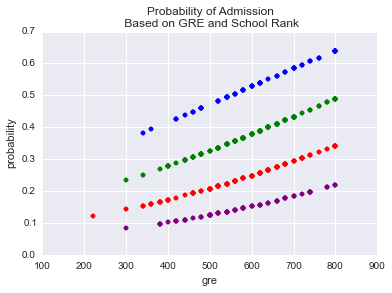

In [5]:
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'purple']
for e, c in enumerate(colors):
    df[df['rank'] == e+1].plot(x='gre', y='probability', kind='scatter', color = c, ax=ax)

    
ax.set(title='Probability of Admission\n Based on GRE and School Rank')

In [6]:
from sklearn import dummy, metrics

In [7]:
model0 = dummy.DummyClassifier()
model0.fit(df[['rank']], df['admit'])
df['probability_0'] = model0.predict_proba(df[['rank']]).T[1]

model1 = lm.LogisticRegression()
model1.fit(df[['rank']], df['admit'])
df['probability_1'] = model1.predict_proba(df[['rank']]).T[1]

model2 = lm.LogisticRegression()
model2.fit(df[['rank', 'gpa']], df['admit'])
df['probability_2'] = model2.predict_proba(df[['rank', 'gpa']]).T[1]

model3 = lm.LogisticRegression()
model3.fit(df[['rank', 'gpa', 'gre']], df['admit'])
df['probability_3'] = model3.predict_proba(df[['rank', 'gpa', 'gre']]).T[1]



 (0, 1),
 (0, 1),

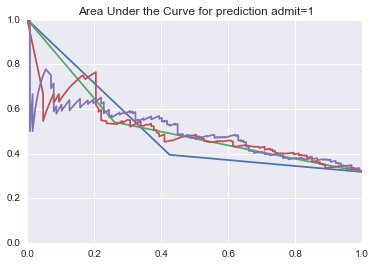

In [8]:
ax = plt.subplot(111)
vals = metrics.precision_recall_curve(df.admit, df.probability_0)
ax.plot(vals[1], vals[0])
vals = metrics.precision_recall_curve(df.admit, df.probability_1)
ax.plot(vals[1], vals[0])
vals = metrics.precision_recall_curve(df.admit, df.probability_2)
ax.plot(vals[1], vals[0])
vals = metrics.precision_recall_curve(df.admit, df.probability_3)
ax.plot(vals[1], vals[0])

ax.set(title='Area Under the Curve for prediction admit=1', ylabel='', xlabel='', xlim=(0, 1), ylim=(0, 1))